In [163]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Ellipse
import numpy as np
import astropy.units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.coordinates import Distance

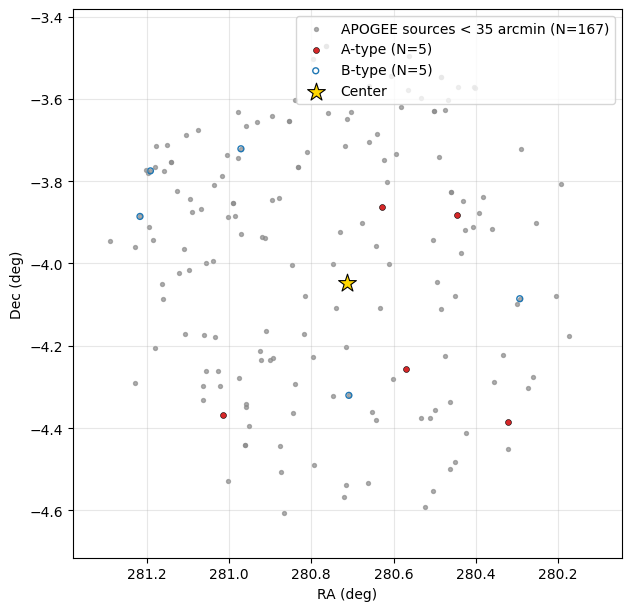

In [164]:
# === G28.37 scatter ===

# center + radius
center = SkyCoord(280.7125*u.deg, -4.0483*u.deg, frame="icrs")  # 18:42:51, -04:02:54
radius = 40 * u.arcmin

# use Tsel if you already computed it; otherwise select from T now
try:
    XY = Tsel[['ra','dec']].copy()
except NameError:
    coords = SkyCoord(T['ra'].to_numpy()*u.deg, T['dec'].to_numpy()*u.deg)
    XY = T.loc[(center.separation(coords) <= radius).value, ['ra','dec']].copy()

fig, ax = plt.subplots(figsize=(6.4, 6.4))

# background points
nAPOGEE = len(XY)
ax.scatter(XY['ra'], XY['dec'], s=8, c='0.55', alpha=0.7,
           label=f'APOGEE sources < 35 arcmin (N={nAPOGEE})')


# OPTIONAL overlays (only if columns exist in T)
if {'parallax','parallax_error'}.issubset(T.columns):
    sn5 = (T.loc[XY.index, 'parallax'].abs() /
           T.loc[XY.index, 'parallax_error'].replace(0, np.nan)) >= 5
    nGaia = sn5.sum()
    ax.scatter(XY.loc[sn5,'ra'], XY.loc[sn5,'dec'], s=10, c='0.3', alpha=0.9,
               label=f'Gaia ϖ/σϖ ≥ 5 (N={nGaia})')

if {'teff','logg'}.issubset(T.columns):
    teff = T.loc[XY.index, 'teff']; logg = T.loc[XY.index, 'logg']
    A = teff.between(7500, 10000, inclusive='both') & (logg >= 3.5)
    B = (teff > 10000) & (teff <= 30000) & (logg >= 3.5)
    nA, nB = A.sum(), B.sum()
    ax.scatter(XY.loc[A,'ra'], XY.loc[A,'dec'], s=18, c='tab:red', edgecolor='k', lw=0.4,
               label=f'A-type (N={nA})')
    ax.scatter(XY.loc[B,'ra'], XY.loc[B,'dec'], s=18, facecolors='none', edgecolors='tab:blue', lw=1.0,
               label=f'B-type (N={nB})')

# center star + rings
ax.scatter(center.ra.deg, center.dec.deg, marker='*', s=180, c='gold', edgecolor='black', lw=0.8,
           label='Center')

# frame & cosmetics
pad = (radius.to(u.deg)).value
ax.set_xlim(center.ra.deg + pad, center.ra.deg - pad)  # flip RA like sky plots
ax.set_ylim(center.dec.deg - pad, center.dec.deg + pad)
ax.set_aspect('equal', 'box'); ax.grid(True, alpha=0.3)
ax.set_xlabel('RA (deg)'); ax.set_ylabel('Dec (deg)')
ax.legend(loc='upper right', frameon=True)
plt.tight_layout()
plt.show()
# plt.savefig('g28_scatter.png', dpi=300, bbox_inches='tight')
